In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define Functions #

def get_frauenhofer_bild( blendenfkt):
    
     U_frauenhofer = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(blendenfkt)))   
     return U_frauenhofer

def get_fresnel_bild_1D( blendenfkt, x, distance, wavelength):
    
    # Make sure blendenfkt is given as function of (x*R, y*R)!!
    
    k = 2*np.pi/wavelength
    quadratic_phase = np.exp(1j*k*(x**2)/(2*distance))
    quadratic_phase_scaled = np.exp(1j*k*distance*(x**2)/2)
    h = (np.exp(1j*k*distance)*quadratic_phase)/(1j*wavelength*distance)
    function_to_transform = blendenfkt*quadratic_phase_scaled
    
    U_fresnel = h*np.fft.fftshift(np.fft.fft( np.fft.ifftshift(function_to_transform)))
    
    return U_fresnel

# Set size of grid and define x, y
num_points = 1000
resolution = 1/num_points

xy = np.mgrid[0:num_points+1, 0:num_points+1] # make grid of points
midpt = num_points/2
xi = (xy[0,:,:] - midpt)*resolution     # x is now centered about 0 and ranges from -0.5.. 0.5
eta = (xy[1,:,:] - midpt)*resolution    # same for y


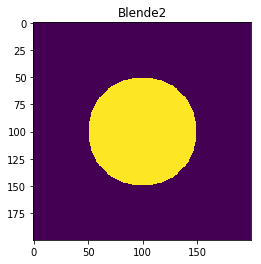

Text(0.5, 1.0, 'Frauenhofer-Beugungsbild Blende 2 ')

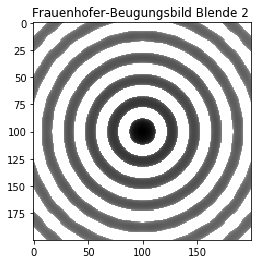

In [11]:
# Circular Aperture (Blende 2: smaller, constant Blendenfunktion)
window_radius = .05
window_circ = np.sqrt(xi**2 + eta**2) < window_radius
blende2 = window_circ
plt.figure(2)
plt.imshow(blende2[400:600,400:600])
plt.title('Blende2')
plt.show()
# Set aperture, get diffraction pattern and plot

blende = blende2

frauenhofer_bild = (np.real(get_frauenhofer_bild(blende)))   # may not be perfectly real due to discreteness
with np.errstate(invalid='ignore'): frauenhofer_bild = np.log10((frauenhofer_bild/np.max(frauenhofer_bild)))# normalize to 1
#frauenhofer_bild = np.log10((frauenhofer_bild/np.max(frauenhofer_bild)))# normalize to 1, better constrast

plt.figure(2)
plt.imshow((frauenhofer_bild[400:600,400:600]) ,  cmap='gray_r') # Plot. "Extent" gives x- and y-axis limits
plt.title('Frauenhofer-Beugungsbild Blende 2 ')

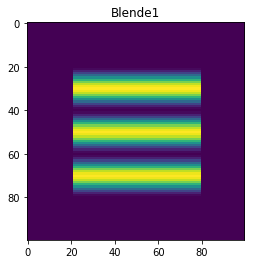

Text(0.5, 1.0, 'Frauenhofer-Beugungsbild Blende 1 ')

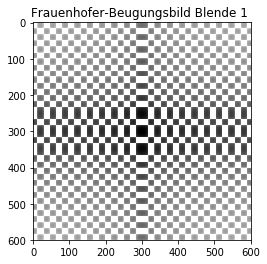

In [12]:
# Rectangular Aperture (Blende 1, moduliert mit cos-Fnkt.)
window_width = .03
window_height= .03
windowx = np.abs(xi)<window_width    # define boundaries of rectangular aperture
windowy = np.abs(eta)<window_height
a=0.02
#blende1 = windowx*windowy*.5*(1+0*np.cos(2*np.pi/a*xi))#np.sqrt(x**2 + y**2)*2)
blende1 = windowx*windowy*.5*(1+np.cos(2*np.pi/a*xi))#np.sqrt(x**2 + y**2)*2)


plt.figure(1)
plt.imshow(blende1[450:550,450:550])
plt.title('Blende1')
plt.show()

blende = blende1
frauenhofer_bild = np.real(get_frauenhofer_bild(blende))   # may not be perfectly real due to discreteness
#frauenhofer_bild = (frauenhofer_bild/np.max(frauenhofer_bild)) # normalize to 1
with np.errstate(invalid='ignore'):frauenhofer_bild = np.log10((frauenhofer_bild/np.max(frauenhofer_bild)))# normalize to 1


plt.figure(2)
plt.imshow((frauenhofer_bild[200:800,200:800]) , cmap='gray_r') # Plot. "Extent" gives x- and y-axis limits
plt.title('Frauenhofer-Beugungsbild Blende 1 ')


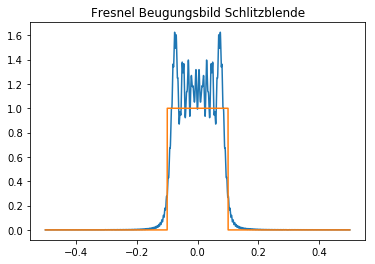

In [13]:
# 1D Fresnel Beugung
    
num_points_1d = 100000      # number of points in our grid
resolution_1d = 1/num_points 
    
x1d = np.linspace(-.5, .5, num_points_1d+1) 

distance = 100 # distance from Schirm

schlitz=0.2/2
blende_rect = distance*np.abs(x1d) < schlitz # \Omega(R*x, R*y) must be scaled so that we can just take normal Fourier Trafo
blende_rect_not_scaled = np.abs(x1d) < schlitz # nonscaled, for plotting

fres = get_fresnel_bild_1D( blende_rect, x1d, distance, 1e-5)
fres = np.abs(fres)/np.abs(fres[int(num_points_1d/2+1)]) #normalize
plt.figure(3)


plt.plot(x1d, fres**2)
plt.plot(x1d, blende_rect_not_scaled)
plt.title('Fresnel Beugungsbild Schlitzblende')

plt.show()